In [4]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_california_housing
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [6]:
data=fetch_california_housing()
X=data.data
y=data.target

In [7]:
X_train, X_test, y_train, y_test=train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [8]:
print("Train size:", len(X_train))
print("Test size:", len(X_test))

Train size: 16512
Test size: 4128


In [10]:
dt_reg=DecisionTreeRegressor(random_state=42)
dt_reg.fit(X_train, y_train)

y_pred=dt_reg.predict(X_test)

print("MSE:", mean_squared_error(y_test, y_pred))
print("R2 score:", r2_score(y_test, y_pred))

MSE: 0.495235205629094
R2 score: 0.622075845135081


In [18]:
det_reg2=DecisionTreeRegressor(max_depth=5, random_state=42)
det_reg2.fit(X_train, y_train)

y_pred2=det_reg2.predict(X_test)

print("MSE (max_depth=5):", mean_squared_error(y_test, y_pred2))
print("R2 score (max_depth=5):", r2_score(y_test, y_pred2))

MSE (max_depth=5): 0.5245146178314735
R2 score (max_depth=5): 0.5997321244428706


In [15]:
for d in range(2, 15):
    model = DecisionTreeRegressor(max_depth=d, random_state=42)
    model.fit(X_train, y_train)
    r2 = r2_score(y_test, model.predict(X_test))
    print(f"Depth {d}: R² = {r2:.3f}")


Depth 2: R² = 0.424
Depth 3: R² = 0.510
Depth 4: R² = 0.554
Depth 5: R² = 0.600
Depth 6: R² = 0.621
Depth 7: R² = 0.652
Depth 8: R² = 0.678
Depth 9: R² = 0.683
Depth 10: R² = 0.683
Depth 11: R² = 0.676
Depth 12: R² = 0.669
Depth 13: R² = 0.666
Depth 14: R² = 0.658


In [21]:
best_dt_reg=DecisionTreeRegressor(max_depth=9, random_state=42)
best_dt_reg.fit(X_train, y_train)

y_pred_best=best_dt_reg.predict(X_test)

print("Final MSE:", mean_squared_error(y_test, y_pred_best))
print("Final R2 score:", r2_score(y_test, y_pred_best))

Final MSE: 0.4150681340811693
Final R2 score: 0.6832529836308363


In [23]:
import pandas as pd

feature_importances=pd.DataFrame({
    'feature':data.feature_names,
    'importance':best_dt_reg.feature_importances_
}).sort_values(by='importance', ascending=False)

feature_importances

,feature,importance
0,MedInc,0.631555
5,AveOccup,0.131729
6,Latitude,0.075473
7,Longitude,0.058643
1,HouseAge,0.043700
2,AveRooms,0.036752
4,Population,0.011276
3,AveBedrms,0.010872


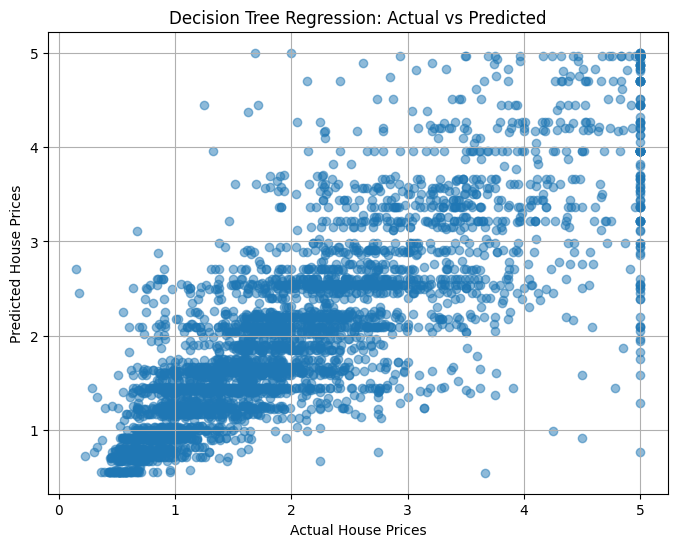

In [25]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred_best, alpha=0.5)
plt.xlabel("Actual House Prices")
plt.ylabel("Predicted House Prices")
plt.title("Decision Tree Regression: Actual vs Predicted")
plt.grid(True)
plt.show()